In [1]:
# Import ibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
housing_data = pd.read_csv("C:\\Desktop\\PROJECT\\Housing.csv")
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
from sklearn.model_selection import train_test_split


X = housing_data.drop(["price"],axis = 1)
y = housing_data["price"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
train_data = X_train.join(y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
43,6000,4,2,4,yes,no,no,no,no,2,no,semi-furnished,7700000
500,2800,3,1,1,yes,no,no,no,no,0,no,unfurnished,2660000
527,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished,2275000
187,6100,3,1,1,yes,no,yes,no,yes,0,yes,semi-furnished,5110000
434,3792,4,1,2,yes,no,no,no,no,0,no,semi-furnished,3290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3480,4,1,2,no,no,no,no,no,1,no,semi-furnished,3290000
134,7000,3,1,1,yes,no,yes,no,no,2,yes,semi-furnished,5803000
72,5020,3,1,4,yes,no,no,no,yes,0,yes,unfurnished,6720000
220,8100,4,1,4,yes,no,yes,no,yes,2,no,semi-furnished,4795000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

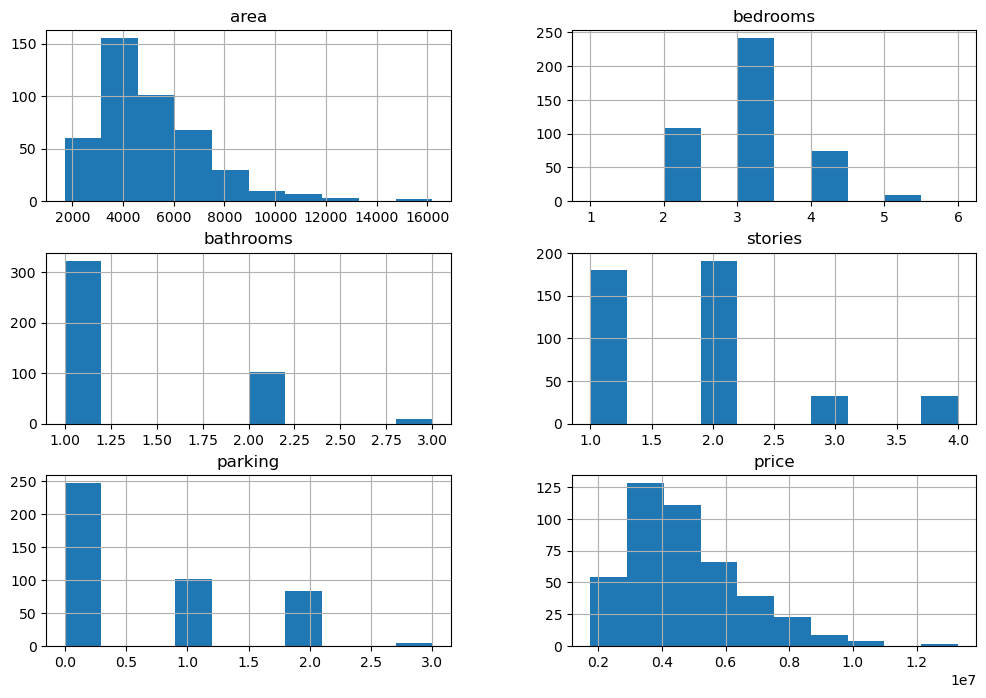

In [7]:
#visuaize data
train_data.hist(figsize=(12,8))

In [8]:
train_data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    187
unfurnished       141
furnished         108
Name: count, dtype: int64

In [9]:
# Replace furnishingstatus column with boolean 
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus,drop_first=True)).drop("furnishingstatus",axis=1)

In [10]:
# Replace specific strings with boolean values
bool_cols = ['basement', 'prefarea', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning']
for col in bool_cols:
    train_data[f"updated_{col}"] = train_data[col].str.lower().map({'yes': 1, 'no': 0})
train_data.drop(columns=bool_cols, inplace=True)

"""
train_data["updated_basement"] = train_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_prefarea"] = train_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_mainroad"] = train_data['mainroad'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_guestroom"] = train_data['guestroom'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_hotwaterheating"] = train_data['hotwaterheating'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
train_data["updated_airconditioning"] = train_data['airconditioning'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})

# Convert the column to boolean type
train_data["updated_basement"] = train_data["updated_basement"].astype(int)
train_data["updated_prefarea"] = train_data["updated_prefarea"].astype(int)
train_data["updated_mainroad"] = train_data["updated_mainroad"].astype(int)
train_data["updated_guestroom"] = train_data["updated_guestroom"].astype(int)
train_data["updated_hotwaterheating"] = train_data["updated_hotwaterheating"].astype(int)
train_data["updated_airconditioning"] = train_data["updated_airconditioning"].astype(int)

# Drop the former basement column

train_data = train_data.drop(columns=["basement","prefarea","mainroad","guestroom","hotwaterheating","airconditioning"])
train_data
"""

'\ntrain_data["updated_basement"] = train_data[\'basement\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\ntrain_data["updated_prefarea"] = train_data[\'prefarea\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\ntrain_data["updated_mainroad"] = train_data[\'mainroad\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\ntrain_data["updated_guestroom"] = train_data[\'guestroom\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\ntrain_data["updated_hotwaterheating"] = train_data[\'hotwaterheating\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\ntrain_data["updated_airconditioning"] = train_data[\'airconditioning\'].replace({\'yes\': True, \'no\': False, \'YES\': True, \'No\': False})\n\n# Convert the column to boolean type\ntrain_data["updated_basement"] = train_data["updated_basement"].astype(int)\ntrain_data["updated_prefarea"] = train_data["updated_prefarea"].astype(int)\

In [11]:
train_data

,area,bedrooms,bathrooms,stories,parking,price,semi-furnished,unfurnished,updated_basement,updated_prefarea,updated_mainroad,updated_guestroom,updated_hotwaterheating,updated_airconditioning
43,6000,4,2,4,2,7700000,True,False,0,0,1,0,0,0
500,2800,3,1,1,0,2660000,False,True,0,0,1,0,0,0
527,1836,2,1,1,0,2275000,True,False,1,0,0,0,0,0
187,6100,3,1,1,0,5110000,True,False,1,1,1,0,0,1
434,3792,4,1,2,0,3290000,True,False,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3480,4,1,2,1,3290000,True,False,0,0,0,0,0,0
134,7000,3,1,1,2,5803000,True,False,1,1,1,0,0,0
72,5020,3,1,4,0,6720000,False,True,0,1,1,0,0,1
220,8100,4,1,4,2,4795000,True,False,1,0,1,0,0,1


<Axes: >

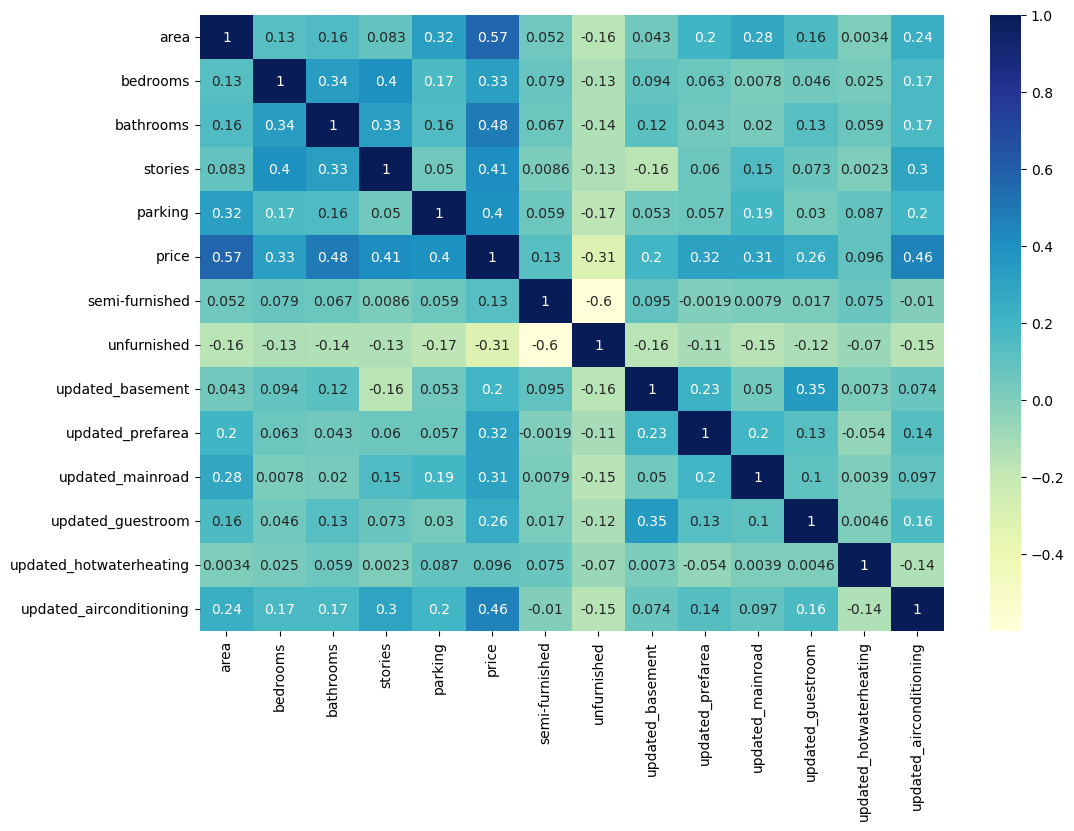

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


In [13]:
#Train and test the data using LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train= train_data.drop(["price"],axis = 1)
y_train = train_data["price"]
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [14]:


test_data = X_test.join(y_test)

# Replace furnishingstatus column with boolean 
test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus,drop_first=True)).drop("furnishingstatus",axis=1)

# test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop("furnishingstatus",axis=1)

# Replace specific strings with boolean values

for col in bool_cols:
    test_data[f"updated_{col}"] = test_data[col].str.lower().map({'yes': 1, 'no': 0})
test_data.drop(columns=bool_cols, inplace=True)

""" Replace specific strings with boolean values
test_data["updated_basement"] = test_data['basement'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_prefarea"] = test_data['prefarea'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_mainroad"] = test_data['mainroad'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_guestroom"] = test_data['guestroom'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_hotwaterheating"] = test_data['hotwaterheating'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})
test_data["updated_airconditioning"] = test_data['airconditioning'].replace({'yes': True, 'no': False, 'YES': True, 'No': False})

# Convert the column to boolean type
test_data["updated_basement"] = test_data["updated_basement"].astype(bool)
test_data["updated_prefarea"] = test_data["updated_prefarea"].astype(bool)
test_data["updated_mainroad"] = test_data["updated_mainroad"].astype(bool)
test_data["updated_guestroom"] = test_data["updated_guestroom"].astype(bool)
test_data["updated_hotwaterheating"] = test_data["updated_hotwaterheating"].astype(bool)
test_data["updated_airconditioning"] = test_data["updated_airconditioning"].astype(bool)

# Drop the former basement column

test_data = test_data.drop(columns=["basement","prefarea","mainroad","guestroom","hotwaterheating","airconditioning"])
"""
test_data

,area,bedrooms,bathrooms,stories,parking,price,semi-furnished,unfurnished,updated_basement,updated_prefarea,updated_mainroad,updated_guestroom,updated_hotwaterheating,updated_airconditioning
332,5500,4,1,2,0,3920000,True,False,1,0,1,1,0,0
276,4400,2,1,1,1,4305000,True,False,0,0,1,0,0,0
351,3600,2,1,1,0,3780000,True,False,0,0,1,0,0,0
466,3090,3,1,2,0,3010000,True,False,0,0,0,0,0,0
214,4350,2,1,1,0,4865000,False,True,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,3000,3,1,2,0,5110000,False,True,1,0,1,0,0,0
120,6540,3,1,1,2,5950000,False,False,1,1,1,1,0,0
317,4992,3,2,2,2,4060000,False,True,0,0,1,0,0,0
117,3700,4,1,2,0,5950000,False,False,0,0,1,1,0,1


In [28]:
X_test= test_data.drop(["price"],axis = 1)
y_test = test_data["price"]
X_test_s = scaler.transform(X_test)


from sklearn.metrics import root_mean_squared_error, mean_absolute_error

preds = model.predict(X_test_s)

print("R² Score:", model.score(X_test_s, y_test))
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", root_mean_squared_error(y_test, preds))
#model.score(X_test_s,y_test)

R² Score: 0.6313120176250914
MAE: 875817.9268565491
RMSE: 1201130.5467145168


In [30]:
#Improving the model by using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test_s,y_test)

0.5095205604184652

In [38]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid ={
    "n_estimators": [6,8,10,20],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                            return_train_score=True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [6, 8, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
best_forest = grid_search.best_estimator_

In [44]:

preds = best_forest.predict(X_test_s)
print("MAE:", mean_absolute_error(y_test, preds))
print("RMSE:", root_mean_squared_error(y_test, preds))

#best_forest.score(X_test,y_test)

MAE: 977501.2782874617
RMSE: 1311246.5881579807


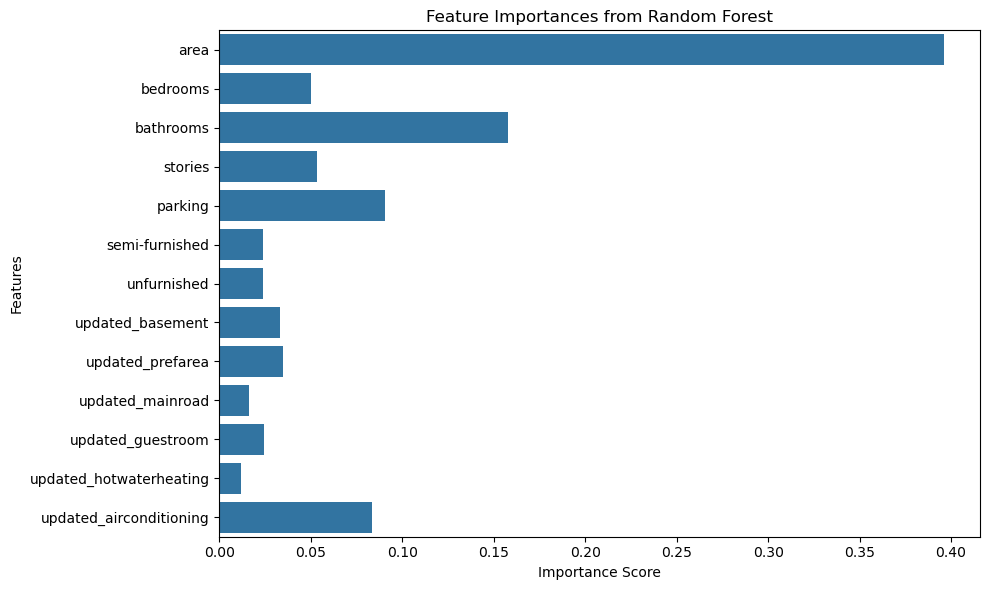

In [48]:
importances = best_forest.feature_importances_
features = X_train.columns  # Use this instead of X_train_s.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

